Youtube Adview Prediction

Importing the libraries and data

In [1]:
#Importing the libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Importing the dataset

dataset = pd.read_csv("train.csv")

print("\n Shape of the dataset: ")
print(dataset.shape)

print("\n\nChecking the dataset")
dataset.head()


 Shape of the dataset: 
(14999, 9)


Checking the dataset


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


Visualizing the data and finding out outliners

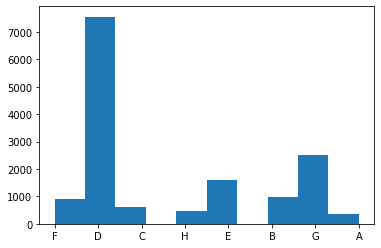

<function matplotlib.pyplot.show(close=None, block=None)>

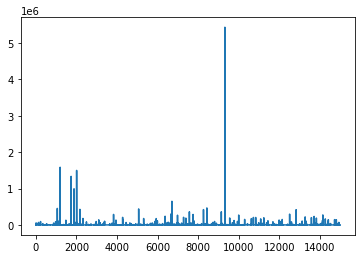

In [3]:
plt.hist(dataset['category'])
plt.show()
plt.plot(dataset['adview'])
plt .show

Preprocessing the data

<function matplotlib.pyplot.show(close=None, block=None)>

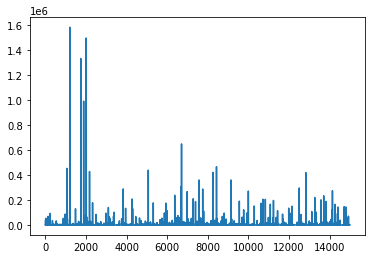

In [4]:
# Removing the outliners

dataset = dataset[dataset["adview"] < 3000000]
plt.plot(dataset['adview'])
plt.show

In [5]:
#Cleaning the dataset
#Removing character "F" present in the data i.e. removing the missing data

dataset=dataset[dataset.views!='F']
dataset=dataset[dataset.likes!='F']
dataset=dataset[dataset.dislikes!='F']
dataset=dataset[dataset.comment!='F']

dataset.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [6]:
#transforming all attributes into numerical values

# Assigning each category a number for Category feature using a dictionary
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
dataset["category"]=dataset["category"].map(category)

# Convert values to integers for views, likes, comments, dislikes and adview
dataset["views"] = pd.to_numeric(dataset["views"])
dataset["comment"] = pd.to_numeric(dataset["comment"])
dataset["likes"] = pd.to_numeric(dataset["likes"])
dataset["dislikes"] = pd.to_numeric(dataset["dislikes"])
dataset["adview"] = pd.to_numeric(dataset["adview"])

column_vidid=dataset['vidid']

dataset.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [7]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
dataset['duration']=LabelEncoder().fit_transform(dataset['duration'])
dataset['vidid']=LabelEncoder().fit_transform(dataset['vidid'])
dataset['published']=LabelEncoder().fit_transform(dataset['published'])
dataset.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [8]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
 y = x[2:]
 h = ''
 m = ''
 s = ''
 mm = ''
 P = ['H','M','S']
 for i in y:
  if i not in P:
    mm+=i
  else:
    if(i=="H"):
       h = mm
       mm = ''
    elif(i == "M"):
       m = mm
       mm = ''
    else:
       s = mm
       mm = ''
 if(h==''):
       h = '00'
 if(m == ''):
       m = '00'
 if(s==''):
       s='00'
 bp = h+':'+m+':'+s
 return bp

train = pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)


def func_sec(time_string):
   h, m, s = time_string.split(':')
   return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)
dataset["duration"]=time1
dataset.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


C:\Users\USER\AppData\Local\Temp\ipykernel_25636\2978267372.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax,annot=True)


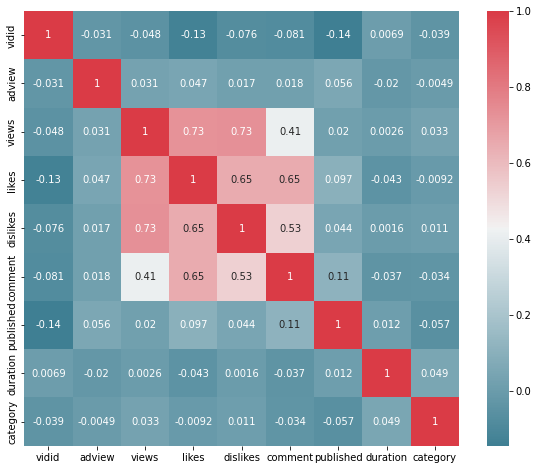

In [9]:
#constructing heatmaps to observe the correlation between the features

f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax,annot=True)
plt.show()

Data Normalisation and Splitting the data 

In [10]:
# Split Data
Y_train = pd.DataFrame(data = dataset.iloc[:, 1].values, columns = ['target'])
dataset=dataset.drop(["adview"],axis=1)
dataset=dataset.drop(["vidid"],axis=1)
dataset.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, Y_train, test_size=0.25, random_state=42)
X_train.shape

(10977, 7)

In [12]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1751233137217991

Use different models to train the data and test the model

In [13]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
 prediction = model_name.predict(X_test)
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
 print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
 print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [14]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3966.4672117709515
Mean Squared Error: 721760023.8163248
Root Mean Squared Error: 26865.591819580764


In [15]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, supportvector_regressor)

c:\Python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 1668.2862583483695
Mean Squared Error: 715870418.8925847
Root Mean Squared Error: 26755.754874280497


In [16]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 3949.6720415414047
Mean Squared Error: 1793369907.9568188
Root Mean Squared Error: 42348.198402728056


In [17]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=10
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

C:\Users\USER\AppData\Local\Temp\ipykernel_25636\1682070854.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3554.3278043340574
Mean Squared Error: 575765825.3599459
Root Mean Squared Error: 23995.120865708217


In [18]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([Dense(10, activation="relu",input_shape=X_train.shape[1:]), Dense(10,activation="relu"), Dense(1)])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
344/344 [==============================] - 1s 2ms/step - loss: 802259584.0000 - mean_squared_error: 802259584.0000
Epoch 2/100
344/344 [==============================] - 1s 2ms/step - loss: 802241472.0000 - mean_squared_error: 802241472.0000
Epoch 3/100
344/344 [==============================] - 1s 2ms/step - loss: 802206464.0000 - mean_squared_error: 802206464.0000
Epoch 4/100
344/344 [==============================] - 1s 2ms/step - loss: 802138304.0000 - mean_squared_error: 802138304.0000
Epoch 5/100
344/344 [==============================] - 1s 3ms/step - loss: 802028224.0000 - mean_squared_error: 802028224.0000
Epoch 6/100
344/344 [==============================] - 1s 4ms/step - loss: 801884736.0000 - mean_squared_error: 801884736.0000
Epoch 7/100
344/344 [==============================] - 1s 3ms/step - loss: 801724480.0000 - mean_squared_error: 801724480.0000
Epoch 8/100
344/344 [==============================] - 1s 2ms/step - loss: 801530432.0000 - mean_squared_error:

Saving the best model

In [19]:
#Saving Scikitlearn models
import joblib
joblib.dump(random_forest, "random_forest_youtubeadview.pkl")

['random_forest_youtubeadview.pkl']

Predicting on unknown data

In [20]:
#importing the data on which prediction is to be done

prediction_data = pd.read_csv('test.csv')
prediction_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [21]:
#cleaning and preprocessing the data from prediction
 
prediction_data = prediction_data[prediction_data.views!='F']
prediction_data = prediction_data[prediction_data.likes!='F']
prediction_data = prediction_data[prediction_data.dislikes!='F']
prediction_data = prediction_data[prediction_data.comment!='F']

category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
prediction_data["category"] = prediction_data["category"].map(category)

prediction_data = prediction_data.drop(["vidid"],axis=1)

prediction_data["views"] = pd.to_numeric(prediction_data["views"])
prediction_data["comment"] = pd.to_numeric(prediction_data["comment"])
prediction_data["likes"] = pd.to_numeric(prediction_data["likes"])
prediction_data["dislikes"] = pd.to_numeric(prediction_data["dislikes"])

from sklearn.preprocessing import LabelEncoder
prediction_data['duration']=LabelEncoder().fit_transform(prediction_data['duration'])
prediction_data['published']=LabelEncoder().fit_transform(prediction_data['published'])


import datetime
import time
def checki(x):
 y = x[2:]
 h = ''
 m = ''
 s = ''
 mm = ''
 P = ['H','M','S']
 for i in y:
  if i not in P:
    mm+=i
  else:
    if(i=="H"):
       h = mm
       mm = ''
    elif(i == "M"):
       m = mm
       mm = ''
    else:
       s = mm
       mm = ''
 if(h==''):
       h = '00'
 if(m == ''):
       m = '00'
 if(s==''):
       s='00'
 bp = h+':'+m+':'+s
 return bp

train = pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)


def func_sec(time_string):
   h, m, s = time_string.split(':')
   return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)
prediction_data["duration"]=time1
prediction_data.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,457,2
1,1040132,8171,340,1047,1825,570,6
2,28534,31,11,1,1009,136,4
3,1316715,2284,250,274,116,262,7
4,1893173,2519,225,116,1892,31,2


In [22]:
X_test= pd.DataFrame(prediction_data, columns = ['views','likes','dislikes','comment','published','duration','category'])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test=scaler.fit_transform(X_test)

prediction = random_forest.predict(X_test)
predicted_adviews = pd.DataFrame(prediction, columns = ['Adviews'], dtype = int)
print(predicted_adviews)

      Adviews
0        1784
1        3632
2          18
3        1078
4       18503
...       ...
8544        9
8545      561
8546      565
8547        2
8548       73

[8549 rows x 1 columns]


C:\Users\USER\AppData\Local\Temp\ipykernel_25636\2071371782.py:8: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  predicted_adviews = pd.DataFrame(prediction, columns = ['Adviews'], dtype = int)


In [24]:
#saving the predicted file

predicted_adviews.to_csv('Predicted_Adviews.csv')